### Importo i packages

In [0]:
#Import packages
import numpy as np
import pandas as pd
import string
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

from collections import Counter
from PIL import Image
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

### Importo i documenti
Il file presenta alcuni errori derivanti dal formato csv. I due while hanno il compito di risolverlo.

In [5]:
reviews = pd.read_csv("tokenizedDataset.csv")

i=0
while i<88130:
    l = reviews['tokens_stemming'][i].replace("'", "").replace("[","").replace("]","").replace(" ","").split(',')
    reviews['tokens_stemming'][i] = l
    i=i+1        
        
i=0
while i<88130:
    l = reviews['tokens'][i].replace("'", "").replace("[","").replace("]","").replace(" ","").split(',')
    reviews['tokens'][i] = l
    i=i+1    
    
# Campo per visualizzare i commenti lunghi
pd.set_option('display.max_colwidth', -1)
reviews.iloc[1:5]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  app.launch_new_instance()


,Unnamed: 0,product,title,tokens_stemming,tokens,category,sentiment
1,1,B07DMJPV31,FIFA 19 - PlayStation 4,"[peggior, peggior, gioc, fif, ultim, anni, dovrebb, gioc, calc, pi, realist, mond, tir, passagg, intervent, cpu, pur, fantascit, rimast, soddisfatt, nemmen, precedent, capitol, fif, ora, ora, rimpiang, risparm, sold, almen, fin, introdurrann, fix, bug, mes, scritt, poss, situazion, peggior, ved, videogioc, ved, nemmen, circ, orfe, arriv, ver, moment, pes]","[peggiori, peggior, gioco, fifa, ultimi, anni, dovrebbe, gioco, calcio, pi, realistico, mondo, tiri, passaggi, interventi, cpu, pura, fantascienza, rimasto, soddisfatto, nemmeno, precedente, capitolo, fifa, ora, ora, rimpiango, risparmiate, soldi, almeno, fino, introdurranno, fix, bug, mese, scritto, posso, situazione, peggiorata, vede, videogioco, vede, nemmeno, circo, orfei, arrivato, veramente, momento, pes]",videogames,negative
2,2,B07DMJPV31,FIFA 19 - PlayStation 4,"[ea, sa, gioc, calc, difes, anno, pegg, anni, terzin, marc, fas, offens, central, corr, fasc, lasc, liber, camp, cross, difes, davver, scandal, pegg, cred, possibil, parl, fut, champions, poch, gioc, averc, gioc, pi, arrabb, rilass, giocator, velocit, riprend, camp, apert, giocator, velocit, ripigl, nemmen, tir, are, port, part, nessun, via, mezz, pall, pal, sembr, radiocomand, giocator, scars, sembr, fenomen, rimpall, irreal, fisic, pallon, fantascientif, addi, fif, pes, piac, almen, prov, cerc, simul, part, spacc, ping, ping, gioc, calc]","[ea, sa, gioco, calcio, difesa, anno, peggio, anni, terzini, marcano, fase, offensiva, centrali, corrono, fasce, lasciando, libero, campo, cross, difesa, davvero, scandalosa, peggio, credevo, possibile, parlare, fut, champions, pochi, giochi, averci, giocato, pi, arrabbiato, rilassato, giocatori, velocit, riprendere, campo, aperto, giocatori, velocit, ripigli, nemmeno, tiri, area, porta, partita, nessuna, via, mezzo, palle, pali, sembrano, radiocomandate, giocatori, scarsi, sembrano, fenomeni, rimpalli, irreali, fisica, pallone, fantascientifica, addio, fifa, pes, piace, almeno, provato, cerca, simulare, partita, spaccia, ping, ping, gioco, calcio]",videogames,negative
3,3,B07DMJPV31,FIFA 19 - PlayStation 4,"[aspett, moment, part, presuppost, rid, cop, problem, ps, pro, ringraz, amazon, temp, rimbors, sold, vals, pen, do, stell, numer, ottim, spedizion, giorn, uscit, second, stell, do, tutt, licenz, contien, fif, ver, fior, occhiell, rest, scriv, fatic, recension, recensor, ser, acquister, spend, sold, gioc, megl, risparm, giocabilit, assurd, giocator, corr, pattin, cit, nhl, fisic, pall, rotol, schizz, temp, pattin, calciator, ugual, realt, sembr, fot, modell, velocit, congru, realt, tropp, tropp, lent, passagg, temp, lent, mov, passagg, ovver, gamb, sembr, baston, gamb, scordin, sens, giocator, sann, dev, pall, not, gioc, pass, simul, arcad, cross, sembr, robotizz, congru, realt, gamb, sembr, mov, ah, ...]","[aspettavo, momento, partiamo, presupposto, ridato, copia, problemi, ps, pro, ringrazio, amazon, tempo, rimborsato, soldi, valsa, pena, do, stelle, numero, ottima, spedizione, giorno, uscita, seconda, stella, do, tutte, licenze, contiene, fifa, veramente, fiore, occhiello, resto, scrivo, fatica, recensione, recensore, serio, acquister, spendete, soldi, gioco, meglio, risparmiarli, giocabilit, assurda, giocatori, corrono, pattinano, cit, nhl, fisica, palla, rotola, schizza, tempo, pattina, calciatori, uguali, realt, sembrano, foto, modelle, velocit, congrua, realt, troppo, troppo, lenta, passaggi, tempo, lenti, movimento, passaggio, ovvero, gambe, sembrano, bastoni, gambe, scordinato, senso, giocatori, sanno, devono, palla, nota, gioco, passato, simulazione, arcade, cross, sembrano, robotizzati, congrui, realt, gambe, sembrano, movimento, ah, ...]",videogames,negative
4,4,B07DMJPV31,FIFA 19 - PlayStation 4,"[regal, figl, comment, titol, gioc, mod, continu, orma, giorn, entusiast, richiest, comment, poter, trascriv, rispost, bellaz, par, complimenton, part, ad

### Trovare le parole positive

In [0]:
positive = reviews[reviews['sentiment'] == 'positive']['tokens_stemming']


### Calcolo le dieci parole più usate nelle recensioni positive


In [15]:
sentences = (list(itertools.chain(positive)))
pos_list = [item for sublist in sentences for item in sublist]
c = Counter(pos_list)
c.most_common(10)

[("'", 1221107),
 (',', 585205),
 (' ', 584394),
 ('i', 324034),
 ('t', 284713),
 ('e', 266600),
 ('r', 264772),
 ('o', 256958),
 ('a', 245178),
 ('n', 237527)]

### Rappresentazione grafica delle parole positive

(-0.5, 399.5, 199.5, -0.5)

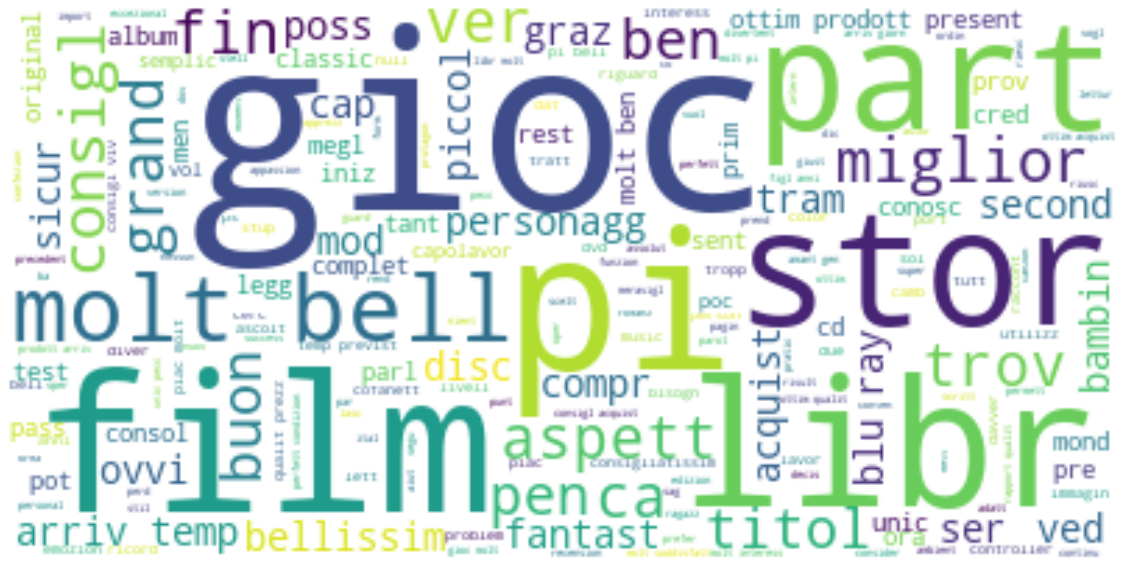

In [16]:
pod_fig = plt.figure(figsize=(20,14))
pos_wordcloud = WordCloud(background_color="white").generate(" ".join(pos_list))
plt.imshow(pos_wordcloud,interpolation='bilinear')
plt.axis("off")

###Trovo le parole negative

In [0]:
negative = reviews[reviews['sentiment'] == 'negative']['tokens_stemming']


### Calcolo le dieci parole più usate nelle recensioni negative



In [19]:
sentences = (list(itertools.chain(negative)))
neg_list = [item for sublist in sentences for item in sublist]
c = Counter(neg_list)
c.most_common(10)

[("'", 137183),
 (',', 66552),
 (' ', 66404),
 ('i', 34607),
 ('t', 31274),
 ('r', 30162),
 ('e', 29847),
 ('o', 27928),
 ('a', 26554),
 ('n', 26406)]

### Rappresentazione grafica negative

(-0.5, 399.5, 199.5, -0.5)

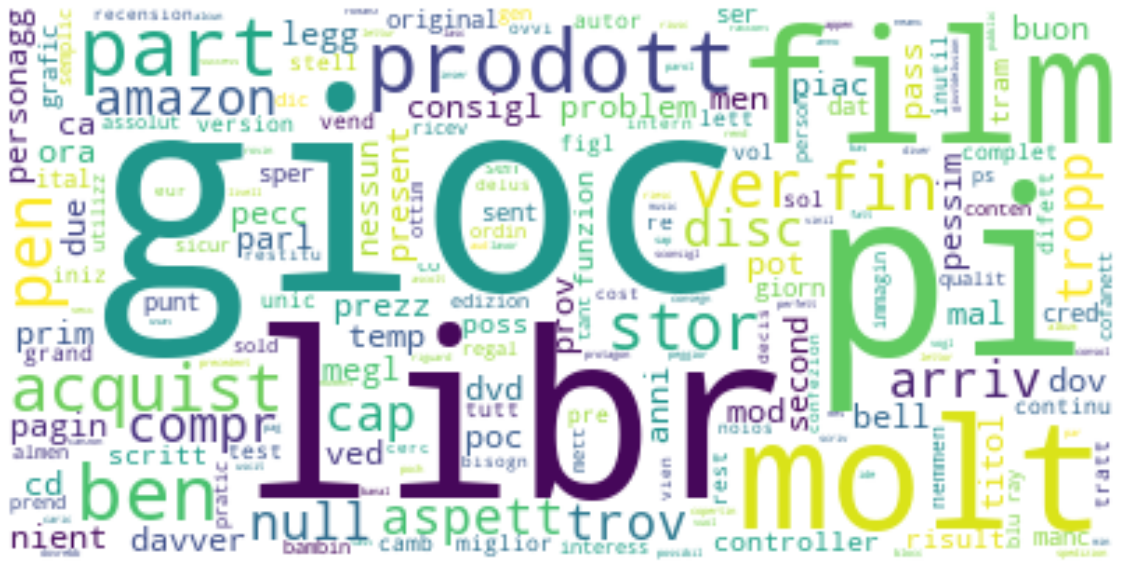

In [21]:
neg_fig = plt.figure(figsize=(20,14))
neg_wordcloud = WordCloud(background_color="white").generate(" ".join(neg_list))
plt.imshow(neg_wordcloud,interpolation='bilinear')
plt.axis("off")